In [1]:
pip install snowflake-connector-python

  Using cached asn1crypto-1.5.1-py2.py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/922.6 kB ? eta -:--:--
   ---------------------------------- ----- 786.4/922.6 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 922.6/922.6 kB 1.7 MB/s eta 0:00:00
Using cached asn1crypto-1.5.1-py2.py3-none-any.whl (105 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import snowflake.connector

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='ashu',
    password='12345@Ashu@12345',
    account='UBANZVT-SF62436',       # e.g., 'abcde-xy12345'
    warehouse='Compute_wh',
    database='Bank',
    schema='Public'
)


In [5]:
cur = conn.cursor()

In [7]:
Select_Clients = 'select * from Clients'

In [9]:
cur.execute(Select_Clients)
df = cur.fetch_pandas_all()

In [11]:
cur.close()
conn.close()

In [13]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2.0,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3.0,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3.0,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4.0,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3.0,1,2,5


In [17]:
df.tail()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
2995,IND66827,Earl Hall,82,8760,2014-10-09,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3.0,3,2,4
2996,IND40556,Billy Williamson,44,32837,2009-02-05,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2.0,3,2,5
2997,IND72414,Victor Black,70,36088,2009-12-29,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2.0,3,2,6
2998,IND46652,Andrew Ford,56,24871,2006-02-13,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1.0,3,2,7
2999,IND40216,Amy Nguyen,79,38518,2005-12-08,Joe Hanson,American,Biostatistician III,High,Jade,...,65617.66,77769.08,32371.38,8992.36,329412.55,1,1.0,3,2,8


In [15]:
df.shape

(3000, 25)

In [19]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int8   
 3   Location ID               3000 non-null   int32  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int8   
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [23]:
df.isnull().sum()

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [29]:
df['Estimated Income'].min()

15919.48

In [31]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low' ,'Med','High']

df['Income Band']= pd.cut(df['Estimated Income'], bins=bins , labels=labels , right=False)

<Axes: xlabel='Income Band'>

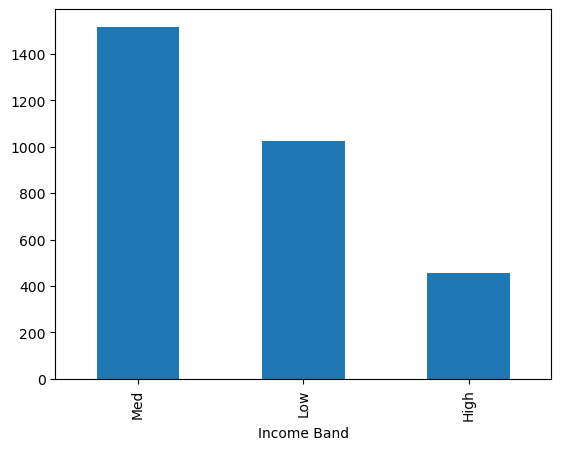

In [39]:
df['Income Band'].value_counts().plot(kind='bar')

In [43]:
#Examine the distribution of unique categories in catergorical columns
categorical_cols = df[["Loyalty Classification","Amount of Credit Cards","Properties Owned", "Nationality" ,"Occupation" ,"Fee Structure","Risk Weighting","BRId" ,"GenderId","IAId"]]

for col in categorical_cols:
    print(f"value counts for '{col}':")
    display(df[col].value_counts())

value counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

value counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

value counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

value counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

value counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

value counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

value counts for 'Risk Weighting':


Risk Weighting
2.0    1222
1.0     836
3.0     460
4.0     322
5.0     160
Name: count, dtype: int64

value counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

value counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

value counts for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Q1: What are the summary statistics for numerical columns?

In [48]:
print(df.describe())

               Age   Location ID  Estimated Income  Superannuation Savings  \
count  3000.000000   3000.000000       3000.000000             3000.000000   
mean     51.039667  21563.323000     171305.034263            25531.599673   
std      19.854760  12462.273017     111935.808209            16259.950770   
min      17.000000     12.000000      15919.480000             1482.030000   
25%      34.000000  10803.500000      82906.595000            12513.775000   
50%      51.000000  21129.500000     142313.480000            22357.355000   
75%      69.000000  32054.500000     242290.305000            35464.740000   
max      85.000000  43369.000000     522330.260000            75963.900000   

       Amount of Credit Cards  Credit Card Balance    Bank Loans  \
count             3000.000000          3000.000000  3.000000e+03   
mean                 1.463667          3176.206943  5.913862e+05   
std                  0.676387          2497.094709  4.575570e+05   
min                  1.00

 Q2: Are there any missing values?

In [55]:
df.isnull().sum()

Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64

Q3: Are there any duplicate rows?

In [58]:
print("Duplicate Rows:",df.duplicated().sum())

Duplicate Rows: 0


Q4: What is the distribution of Age, Estimated Income, and Deposits?

In [ ]:
Numeric_features = ['Age','Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans', 'Bank Deposits']

for col in Numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Q5: What is the count distribution of Gender, Occupation, and Loyalty Classification?

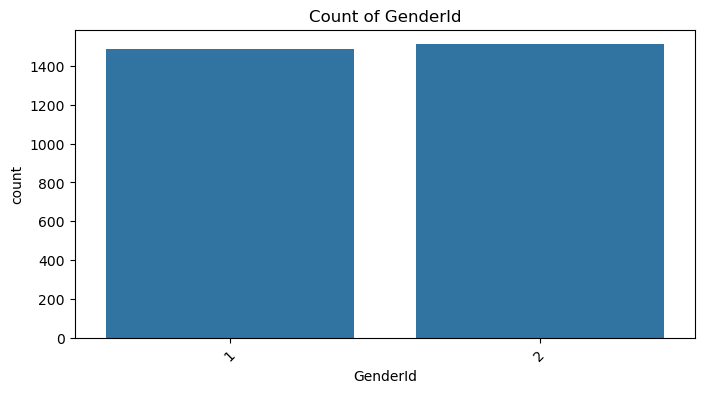

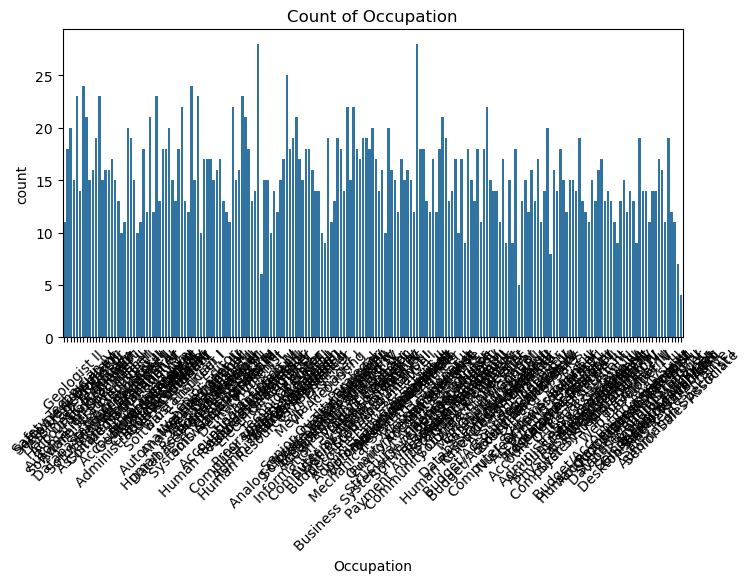

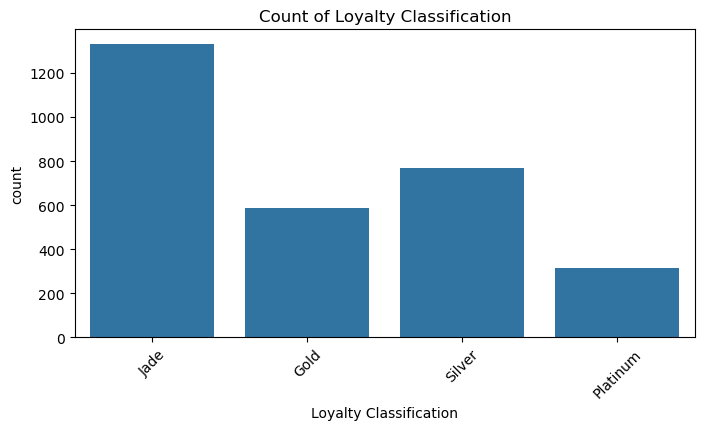

In [88]:
Count_features = ['GenderId','Occupation', 'Loyalty Classification']

for col in Count_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()
    

Q6: What features are most correlated with Bank Deposits and Loans?

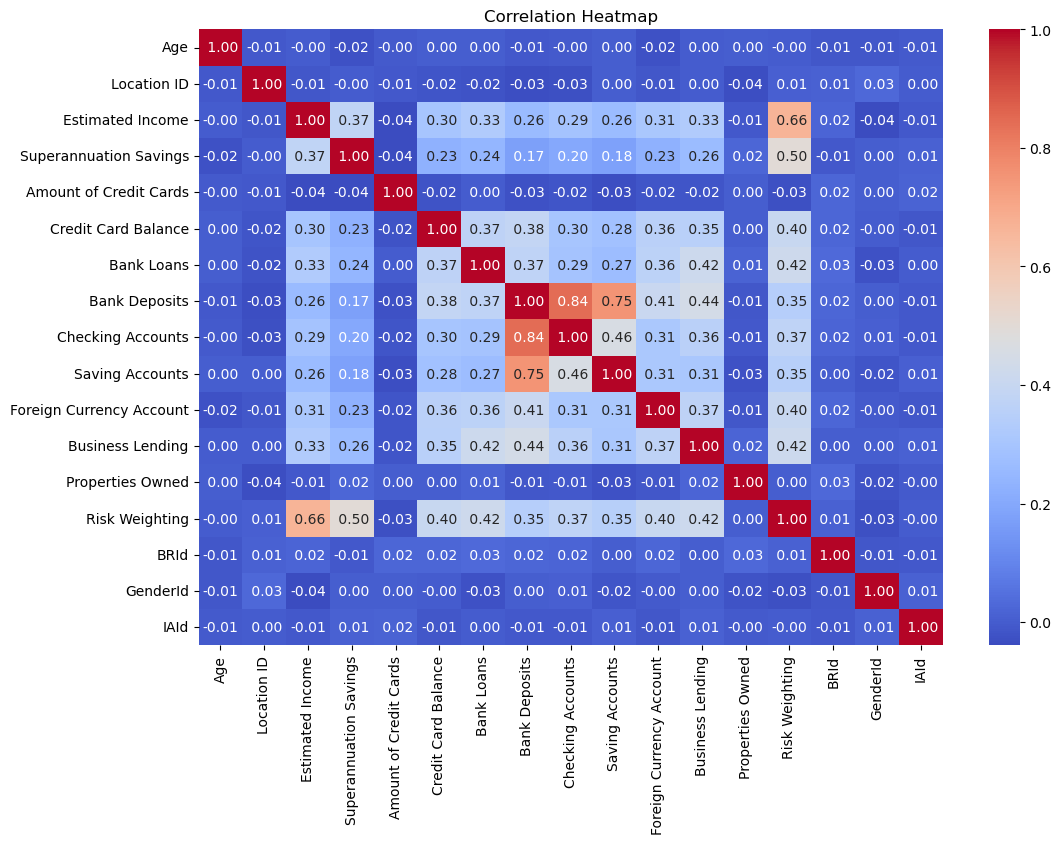

In [97]:
Correlation = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(Correlation , annot=True, fmt=" .2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Q7: How does Estimated Income vary by Occupation?

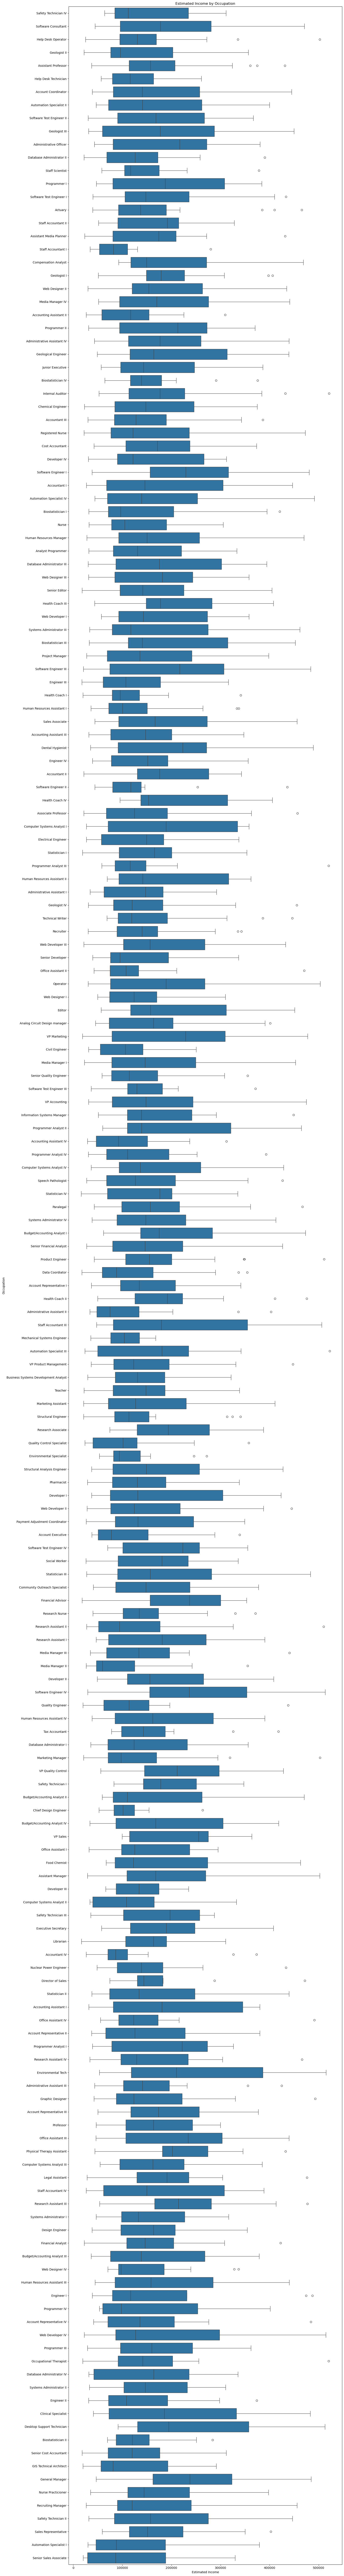

In [110]:
plt.figure(figsize=(16,119))
sns.boxplot(data=df, y='Occupation', x='Estimated Income')
plt.title('Estimated Income by Occupation')
plt.tight_layout()
plt.show()


Q8: How do Bank Deposits differ by Loyalty Classification?

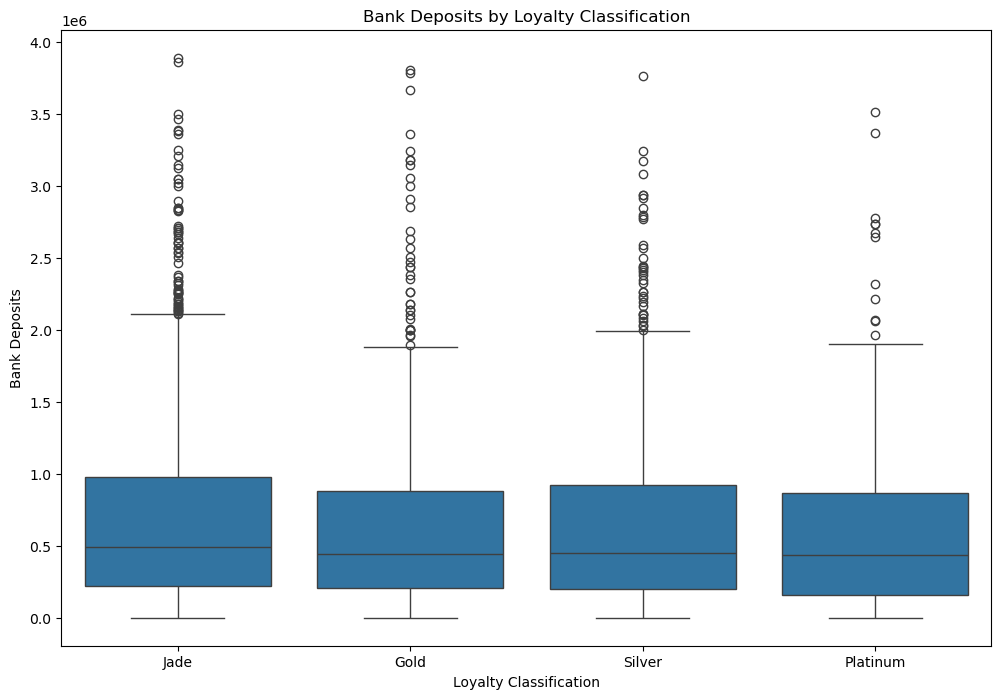

In [128]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Loyalty Classification', y='Bank Deposits')
plt.title('Bank Deposits by Loyalty Classification')
plt.show()

Q9: What’s the relationship between Age and Deposits?

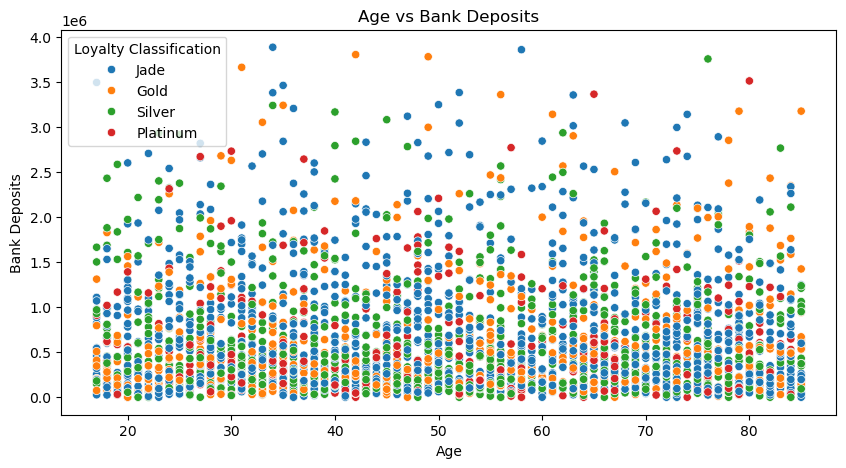

In [144]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Age', y='Bank Deposits' , hue='Loyalty Classification')
plt.title('Age vs Bank Deposits')
plt.show()

Q10: How many properties do people own by income group?

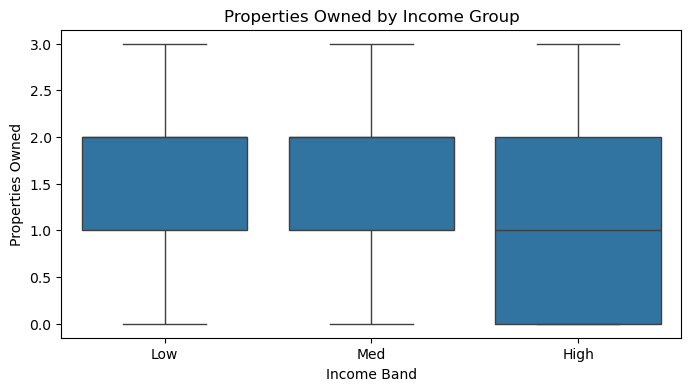

In [147]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Income Band', y='Properties Owned')
plt.title('Properties Owned by Income Group')
plt.show()

Q13: Is tenure (years with bank) impacting loyalty?

In [156]:
# Convert 'Joined Bank' to datetime (safe even if it's already in datetime format)
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'])

In [158]:
# Calculate years with the bank
df['Years With Bank'] = (pd.Timestamp.today() - df['Joined Bank']).dt.days // 365

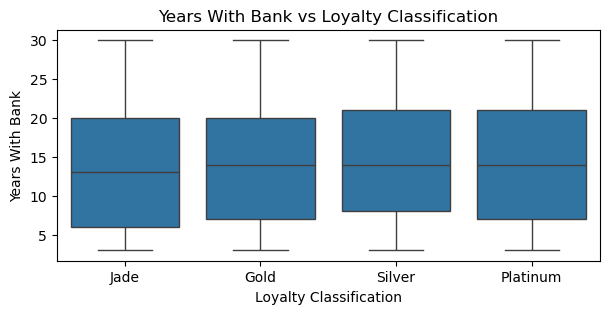

In [164]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df, x='Loyalty Classification' , y='Years With Bank')
plt.title("Years With Bank vs Loyalty Classification")
plt.show()

Q14: How do savings differ by loyalty classification?


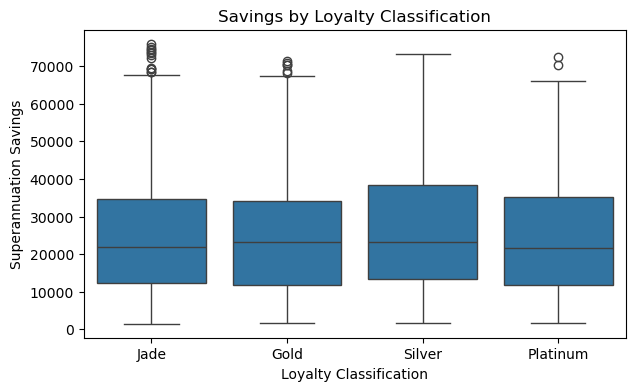

In [167]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Loyalty Classification', y='Superannuation Savings')
plt.title("Savings by Loyalty Classification")
plt.show()


## Let’s do the clustering and send it back to Snowflake

What is Clustering?
Clustering is an unsupervised machine learning technique that groups similar data points together based on their features — without needing any predefined labels.

Imagine you have 1000 bank customers, and you want to segment them into groups based on their income, loans, savings, and deposits.

👉 But you don’t know in advance which customer belongs to which group.
That’s where clustering comes in!

📦 Think of it like…
🔸 You walk into a room full of people
🔸 You don’t know anything about them
🔸 But you start grouping them based on visible traits:

Group 1: High income + Big savings

Group 2: Low income + High loans

Group 3: Average income + moderate savings

That’s clustering and the algorithm figures out these patterns for Us.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [87]:
# Select relevant features
features = df[['Estimated Income', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits']]

In [89]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [91]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [93]:
# Create a mapping based on average values of income or loans per cluster
cluster_summary = df.groupby('cluster')[['Estimated Income', 'Bank Loans']].mean()
print(cluster_summary)

         Estimated Income    Bank Loans
cluster                                
0           100319.705976  3.877015e+05
1           220411.669571  1.092811e+06
2           298300.827978  6.646756e+05


In [95]:
# Let's say from your summary you found:
# Cluster 2 → High Risk
# Cluster 1 → Medium Risk
# Cluster 0 → Low Risk

risk_map = {
    2: 'High Risk',
    1: 'Medium Risk',
    0: 'Low Risk'
}

# Add the labeled risk category
df['risk_category'] = df['cluster'].map(risk_map)

In [101]:
print(df[['Estimated Income', 'Bank Loans', 'cluster', 'risk_category']].head())

   Estimated Income  Bank Loans  cluster risk_category
0          75384.77   776242.92        0      Low Risk
1         289834.31  1270615.43        2     High Risk
2         169935.23  1052715.84        1   Medium Risk
3         356808.11   121195.06        2     High Risk
4         130711.68  1048301.95        0      Low Risk


In [99]:
# Step 6: Add risk category column to the DataFrame
df['risk_category'] = df['cluster'].map(risk_map)

In [103]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,cluster,risk_category
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,607332.46,12249.96,1134475.30,1,2.0,1,1,1,0,Low Risk
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,344635.16,61162.31,2000526.10,1,3.0,2,1,2,2,High Risk
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,203054.35,79071.78,548137.58,1,3.0,3,2,3,1,Medium Risk
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,234685.02,57513.65,1148402.29,0,4.0,4,1,4,2,High Risk
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,128351.45,30012.14,1674412.12,0,3.0,1,2,5,0,Low Risk


In [105]:
from sqlalchemy import create_engine

# Your Snowflake credentials
username = 'Ashu'
password = '12345%40Ashu%4012345'  
account = 'UBANZVT-SF62436'
database = 'Bank'
schema = 'Public'
warehouse = 'Compute_wh'
role = 'ACCOUNTADMIN'

# Create the Snowflake connection string
connection_string = f'snowflake://{username}:{password}@{account}/{database}/{schema}?warehouse={warehouse}&role={role}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Push your already-loaded DataFrame to a new table
df.to_sql('CLUSTERED_BANKING_CUSTOMERS', con=engine, index=False, if_exists='replace')

print("✅ DataFrame uploaded to Snowflake table: CLUSTERED_BANKING_CUSTOMERS")

C:\Users\asmit\AppData\Local\Temp\ipykernel_23036\54577737.py:19: UserWarning: The provided table name 'CLUSTERED_BANKING_CUSTOMERS' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql('CLUSTERED_BANKING_CUSTOMERS', con=engine, index=False, if_exists='replace')


✅ DataFrame uploaded to Snowflake table: CLUSTERED_BANKING_CUSTOMERS


In [85]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2.0,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3.0,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3.0,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4.0,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3.0,1,2,5
